In [1]:
import geopandas as gpd

data = gpd.read_file("../resources/NaturalEarth/10m_cultural/ne_10m_time_zones.shp")
countries = gpd.read_file("../resources/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")

In [2]:
print(data.columns)
print(data.zone.value_counts())

Index(['objectid', 'scalerank', 'featurecla', 'name', 'map_color6',
       'map_color8', 'note', 'zone', 'utc_format', 'time_zone', 'iso_8601',
       'places', 'dst_places', 'tz_name1st', 'tz_namesum', 'geometry'],
      dtype='object')
 5.00     8
 6.00     7
-3.00     6
 12.00    5
 0.00     5
 3.00     5
 7.00     5
 2.00     5
-11.00    5
 9.00     5
-12.00    5
-10.00    4
-9.00     4
 10.00    4
 11.00    4
-4.00     3
 5.50     3
-8.00     3
-2.00     3
-1.00     3
 4.00     3
-6.00     2
 6.50     2
 1.00     2
 8.00     2
-7.00     2
-5.00     2
 13.00    1
 8.75     1
 14.00    1
-9.50     1
-3.50     1
 12.75    1
-4.50     1
 11.50    1
 10.50    1
 5.75     1
 4.50     1
 3.50     1
 9.50     1
Name: zone, dtype: int64


In [3]:
data = data.sort_values('name')
data['name'] = data['name'].astype(float)

In [4]:
main_windows = data.map_color6.unique().tolist()

In [5]:
x = data.name.unique().tolist()
x.sort()
print(x)

[-12.0, -11.0, -10.0, -9.5, -9.0, -8.0, -7.0, -6.0, -5.0, -4.5, -4.0, -3.5, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 5.75, 6.0, 6.5, 7.0, 8.0, 8.75, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.75, 13.0, 14.0]


In [6]:
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib

purples = cm.get_cmap('jet', 40)
newcolors = purples(np.linspace(0, 1, 40))
colors = []
for i in range(40):
    rgb = newcolors[i][:3]  # will return rgba, we take only first 3 so we get rgb
    colors.append(matplotlib.colors.rgb2hex(rgb))
colors = pd.DataFrame({'name': x, 'color': colors})
data = pd.merge(data, colors, on='name')

In [7]:
new_data = gpd.sjoin(data, countries, op='intersects')

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
print(new_data)

     objectid  scalerank_left featurecla_left  name  map_color6  map_color8  \
0           0               6        Timezone   1.0           5           2   
1          16               6        Timezone   1.0           5           2   
3           0               6        Timezone  10.0           2           5   
5          31               6        Timezone  10.0           2           5   
10         33               6        Timezone  11.0           1           6   
..        ...             ...             ...   ...         ...         ...   
115        15               6        Timezone   0.0           6           1   
116        15               6        Timezone   0.0           6           1   
116        15               6        Timezone   0.0           6           1   
116        15               6        Timezone   0.0           6           1   
116        15               6        Timezone   0.0           6           1   

     note  zone utc_format  time_zone  ... NAME_JA 

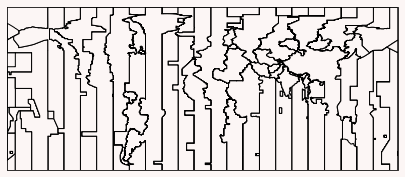

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF', subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(7, 3.5)
ax.set_facecolor('#FCF6F5FF')
new_data.plot(ax=ax, color='#FCF6F5FF', edgecolor='black', lw=1, transform=ccrs.PlateCarree())
#data.plot(ax=ax, color=data['color'], edgecolor='black', transform=ccrs.PlateCarree(), alpha=0.8)
ax.set_ylim(-60, 90)
plt.show()

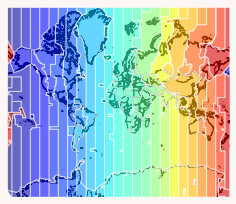

In [14]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', subplot_kw={'projection': ccrs.Mercator()})
fig.set_size_inches(7, 3.5)
countries.plot(ax=ax, color='none', edgecolor='black', lw=1, transform=ccrs.PlateCarree())
data.plot(ax=ax, color=data['color'], edgecolor='white', lw=1, transform=ccrs.PlateCarree(), alpha=0.6)

plt.setp(ax.spines.values(), color='#FCF6F5FF')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#FCF6F5FF')
plt.show()